In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import torch
import random
import torch

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/dataset.csv')
data['hate'] = data['label'].apply(lambda x : 1 if x =='hate' else 0)

In [ ]:
train_size = (int)(len(data)*0.8)
train_df = data[ 0 : train_size ]
eval_df = data[train_size:-1]
train_df = train_df[['text', 'hate']]
eval_df = eval_df[['text', 'hate']]

In [ ]:
train_df

,text,hate
0,dalits are lowlives,1
1,gay people are a burden to our society,1
2,Arabs are not welcome,1
3,I'm not saying we should actually eliminate he...,1
4,bananas are for black people,1
...,...,...
32910,That's what I'm talking about. I fucking despi...,1
32911,She always identified as black during the deba...,1
32912,Definitely. They're Japanese girls. I think Ja...,1
32913,The Indo-Aryans were nomadic so weren't huge i...,1


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import line_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'drive/MyDrive/ColabNotebooks/glove.6B.50d.txt')


In [ ]:
import numpy as np 
import pandas as pd 
import nltk
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
import re 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from tensorflow.keras.utils import pad_sequences



def message_to_token_list(s):
  tokens = word_tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]
  return useful_tokens

message_to_token_list('@user feet a fathers is apple attention dysfunctional and is')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['@',
 'user',
 'foot',
 'a',
 'father',
 'is',
 'apple',
 'attention',
 'dysfunctional',
 'and',
 'is']

In [ ]:
x = data['text']
y = data['hate']

In [ ]:
for i in range(0, len(x)):
  review = x[i]
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review ]
  x[i] = review
x

<ipython-input-49-79b1c6d4efac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = review


0                                  [dalits, are, lowlives]
1          [gay, people, are, a, burden, to, our, society]
2                                [arab, are, not, welcome]
3        [i'm, not, saying, we, should, actually, elimi...
4                        [banana, are, for, black, people]
                               ...                        
41139                 [indian, culture, is, so, backwards]
41140    [woman, don't, want, equality,, they, just, wa...
41141                                        [fuck, covid]
41142                        [this, computer, is, garbage]
41143          [the, only, good, muslim, is, a, dead, one]
Name: text, Length: 41144, dtype: object

In [ ]:
def message_to_word_vectors(message, word_dict=words):
  vectors = []

  for token in message:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

 

In [ ]:
counter=0;
for curr in x:
  x[counter]=message_to_word_vectors(curr)
  counter=counter+1

<ipython-input-51-06f20f7a6c8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[counter]=message_to_word_vectors(curr)


In [ ]:
xx = []

for i in x:
  xx.append(i)


xxx = pad_sequences(xx, maxlen = 25, padding = 'pre', value = 0.000, dtype = 'float')
xxx.shape

(41144, 25, 50)

In [ ]:
y = np.array(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (xxx.shape[1], 50)))
model.add(LSTM(128))
model.add(Dense(1000))
model.add(Dense(10))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 25, 256)           314368    
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dense_3 (Dense)             (None, 1000)              129000    
                                                                 
 dense_4 (Dense)             (None, 10)                10010     
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 650,509
Trainable params: 650,509
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = y.reshape(-1, 1)

In [ ]:
train_size = (int)(40000*0.8)
test_size = 40000-train_size

x_train = xxx[0:train_size]
y_train = y[0:train_size]
x_test = xxx[train_size:-1]
y_test = y[train_size:-1]

In [ ]:
y_train.shape

(32000, 1)

In [ ]:
sgd = model
sgd2 = model

In [ ]:
sgd.summary()

AttributeError: ignored

In [ ]:
model.compile(loss ='mean_squared_error', optimizer = 'adam', metrics=[ "acc"])
model.fit(x_train, y_train, epochs = 20, batch_size = 10, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/20
3200/3200 [==============================] - 29s 8ms/step - loss: 0.2444 - acc: 0.5638 - val_loss: 0.1968 - val_acc: 0.7064
Epoch 2/20
3200/3200 [==============================] - 26s 8ms/step - loss: 0.2252 - acc: 0.6258 - val_loss: 0.1965 - val_acc: 0.7017
Epoch 3/20
3200/3200 [==============================] - 26s 8ms/step - loss: 0.2144 - acc: 0.6489 - val_loss: 0.1833 - val_acc: 0.7132
Epoch 4/20
3200/3200 [==============================] - 28s 9ms/step - loss: 0.2048 - acc: 0.6702 - val_loss: 0.1769 - val_acc: 0.7306
Epoch 5/20
3200/3200 [==============================] - 30s 9ms/step - loss: 0.1950 - acc: 0.6887 - val_loss: 0.1711 - val_acc: 0.7403
Epoch 6/20
3200/3200 [==============================] - 38s 12ms/step - loss: 0.1855 - acc: 0.7096 - val_loss: 0.1744 - val_acc: 0.7354
Epoch 7/20
3200/3200 [==============================] - 27s 8ms/step - loss: 0.1737 - acc: 0.7300 - val_loss: 0.1822 - val_acc: 0.7325
Epoch 8/20
3200/3200 [==============================] 

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=66f7e4142f5e7d63974ed79aa963d067ec87b6164b3e433dbd4a7b6dd07f5b92
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [ ]:
x_eval = x_test
y_eval = y_test


In [ ]:
y_eval.shape

(9143, 1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer, InputExample, losses, models, datasets, evaluation
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import torch
import random
import torch

def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

In [ ]:
def sentence_pairs_generation(sentences, labels, pairs):
	# initialize two empty lists to hold the (sentence, sentence) pairs and
	# labels to indicate if a pair is positive or negative

  numClassesList = np.unique(labels)
  idx = [np.where(labels == i)[0] for i in numClassesList]

  for idxA in range(len(sentences)):      
    currentSentence = sentences[idxA]
    label = labels[idxA]
    idxB = np.random.choice(idx[np.where(numClassesList==label)[0][0]])
    posSentence = sentences[idxB]
		  # prepare a positive pair and update the sentences and labels
		  # lists, respectively
    pairs.append(InputExample(texts=[currentSentence, posSentence], label=1.0))

    negIdx = np.where(labels != label)[0]
    negSentence = sentences[np.random.choice(negIdx)]
		  # prepare a negative pair of images and update our lists
    pairs.append(InputExample(texts=[currentSentence, negSentence], label=0.0))
  
	# return a 2-tuple of our image pairs and labels
  return (pairs)

In [ ]:
# from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

sgd = Sequential()
sgd.add(Embedding(50, 50, input_shape = (768,)))
sgd.add(LSTM(256, return_sequences = True))
sgd.add(LSTM(128))
sgd.add(Dense(1000))
sgd.add(Dense(10))
sgd.add(Dense(1))

sgd.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 768, 50)           2500      
                                                                 
 lstm_21 (LSTM)              (None, 768, 256)          314368    
                                                                 
 lstm_22 (LSTM)              (None, 128)               197120    
                                                                 
 dense_33 (Dense)            (None, 1000)              129000    
                                                                 
 dense_34 (Dense)            (None, 10)                10010     
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 653,009
Trainable params: 653,009
Non-t

In [ ]:
sgd2 = Sequential()
sgd2.add(Embedding(50, 50, input_shape = (768,)))
sgd2.add(LSTM(256, return_sequences = True))
sgd2.add(LSTM(128))
sgd2.add(Dense(1000))
sgd2.add(Dense(10))
sgd2.add(Dense(1))

sgd2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 768, 50)           2500      
                                                                 
 lstm_23 (LSTM)              (None, 768, 256)          314368    
                                                                 
 lstm_24 (LSTM)              (None, 128)               197120    
                                                                 
 dense_36 (Dense)            (None, 1000)              129000    
                                                                 
 dense_37 (Dense)            (None, 10)                10010     
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 653,009
Trainable params: 653,009
Non-t

In [ ]:
#@title SetFit
st_model = 'paraphrase-mpnet-base-v2' #@param ['paraphrase-mpnet-base-v2', 'all-mpnet-base-v1', 'all-mpnet-base-v2', 'stsb-mpnet-base-v2', 'all-MiniLM-L12-v2', 'paraphrase-albert-small-v2', 'all-roberta-large-v1']
num_training = 54 #@param ["8", "16", "32", "54", "128", "256", "512"] {type:"raw"}
num_itr = 10 #@param ["1", "2", "3", "4", "5", "10"] {type:"raw"}
plot2d_checkbox = False #@param {type: 'boolean'}
epochs = 1 #@param ["1", "2", "3", "4", "5", "10", "20", "50"] {type:"raw"}

set_seed(0)
# Equal samples per class training
train_df_sample = pd.concat([train_df[train_df['hate']==0].sample(num_training), train_df[train_df['hate']==1].sample(num_training)])
x_train = train_df_sample['text'].values.tolist()
y_train = train_df_sample['hate'].values.tolist()

train_examples = [] 
for x in range(num_itr):
  train_examples = sentence_pairs_generation(np.array(x_train), np.array(y_train), train_examples)

orig_model = SentenceTransformer(st_model)
model = SentenceTransformer(st_model)

# S-BERT adaptation 
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=epochs, warmup_steps=10, show_progress_bar=True)

# No Fit
X_train_noFT = orig_model.encode(x_train)
X_eval_noFT = orig_model.encode(x_eval)


# sgd =  LogisticRegression()
# sgd.fit(X_train_noFT, y_train)


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

In [ ]:
X_train_noFT.shape, X_eval_noFT.shape, len(y_train)

((108, 768), (9143, 768), 108)

In [ ]:
y_train1 = np.array(y_train).reshape(-1, 1)
y_train1.shape

(108, 1)

In [ ]:
y_train1

In [ ]:
x_eval.shape, y_eval.shape

((9143, 25, 50), (9143, 1))

In [ ]:
#@title SetFit
st_model = 'paraphrase-mpnet-base-v2' #@param ['paraphrase-mpnet-base-v2', 'all-mpnet-base-v1', 'all-mpnet-base-v2', 'stsb-mpnet-base-v2', 'all-MiniLM-L12-v2', 'paraphrase-albert-small-v2', 'all-roberta-large-v1']
num_training = 54 #@param ["8", "16", "32", "54", "128", "256", "512"] {type:"raw"}
num_itr = 10 #@param ["1", "2", "3", "4", "5", "10"] {type:"raw"}
plot2d_checkbox = False #@param {type: 'boolean'}
epochs = 1 #@param ["1", "2", "3", "4", "5", "10", "20", "50"] {type:"raw"}


sgd.compile(loss ='mean_squared_error', optimizer = 'adam', metrics=[ "acc"])
sgd.fit(X_train_noFT, y_train1, epochs = epochs, batch_size = 10, verbose = 1)
y_pred_eval_sgd = sgd.predict(X_eval_noFT)


286/286 [==============================] - 9s 30ms/step


In [ ]:
len(y_pred_eval_sgd)

9143

In [ ]:
y = y_eval.reshape(-1,)
y.shape

(9143,)

In [ ]:
y = y.tolist()

In [ ]:
y, y_pred_eval_sgd

In [ ]:
#@title SetFit
st_model = 'paraphrase-mpnet-base-v2' #@param ['paraphrase-mpnet-base-v2', 'all-mpnet-base-v1', 'all-mpnet-base-v2', 'stsb-mpnet-base-v2', 'all-MiniLM-L12-v2', 'paraphrase-albert-small-v2', 'all-roberta-large-v1']
num_training = 54 #@param ["8", "16", "32", "54", "128", "256", "512"] {type:"raw"}
num_itr = 10 #@param ["1", "2", "3", "4", "5", "10"] {type:"raw"}
plot2d_checkbox = False #@param {type: 'boolean'}
epochs = 1 #@param ["1", "2", "3", "4", "5", "10", "20", "50"] {type:"raw"}

print('Acc. No Fit', accuracy_score(y, y_pred_eval_sgd.round()))

# With Fit (SetFit)
X_train = model.encode(x_train)
X_eval = model.encode(x_eval)

# sgd =  LogisticRegression()
# sgd2.fit(X_train, y_train)

sgd2.compile(loss ='mean_squared_error', optimizer = 'adam', metrics=[ "acc"])
sgd2.fit(X_train, y_train1, epochs = epochs, batch_size = 10, verbose = 1)
y_pred_eval_sgd2 = sgd2.predict(X_eval)

print('Acc. SetFit', accuracy_score(y, y_pred_eval_sgd2.round()))

#Plot 2-D 2x2 figures
if plot2d_checkbox:   

  plt.figure(figsize=(20,10))

#Plot X_train_noFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_noFT))
  plt.subplot(221)
  plt.title('X_train No Fit')

  for i, t in enumerate(set(np.array(y_train))):
      idx = np.array(y_train) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));

#Plot X_eval noFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_noFT))
  plt.subplot(223)
  plt.title('X_eval No Fit')

  for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));


#Plot X_train SetFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train))

  plt.subplot(222)
  plt.title('X_train SetFit')

  for i, t in enumerate(set(np.array(y_train))):
      idx = np.array(y_train) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));

#Plot X_eval SetFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval))
  plt.subplot(224)
  plt.title('X_eval SetFit')

  for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));


Acc. No Fit 0.6167559881876846
286/286 [==============================] - 8s 24ms/step
Acc. SetFit 0.38324401181231543


In [ ]:
# from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

sgd = Sequential()
sgd.add(Embedding(50, 50, input_shape = (768,)))
sgd.add(LSTM(256, return_sequences = True))
sgd.add(LSTM(128))
sgd.add(Dense(1000))
sgd.add(Dense(10))
sgd.add(Dense(1))

sgd2 = Sequential()
sgd2.add(Embedding(50, 50, input_shape = (768,)))
sgd2.add(LSTM(256, return_sequences = True))
sgd2.add(LSTM(128))
sgd2.add(Dense(1000))
sgd2.add(Dense(10))
sgd2.add(Dense(1))

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

Iteration:   0%|          | 0/135 [00:00<?, ?it/s]

Epoch 1/10
11/11 [==============================] - 5s 71ms/step - loss: 0.2845 - acc: 0.4815
Epoch 2/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2673 - acc: 0.4815
Epoch 3/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2584 - acc: 0.4815
Epoch 4/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2711 - acc: 0.5556
Epoch 5/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2575 - acc: 0.5370
Epoch 6/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2560 - acc: 0.5370
Epoch 7/10
11/11 [==============================] - 1s 56ms/step - loss: 0.2616 - acc: 0.4444
Epoch 8/10
11/11 [==============================] - 1s 60ms/step - loss: 0.2530 - acc: 0.4815
Epoch 9/10
11/11 [==============================] - 1s 60ms/step - loss: 0.2659 - acc: 0.3889
Epoch 10/10
286/286 [==============================] - 8s 25ms/step
Acc. No Fit 0.38324401181231543
Epoch 1/10
11/11 [==============================] - 6s

TypeError: ignored

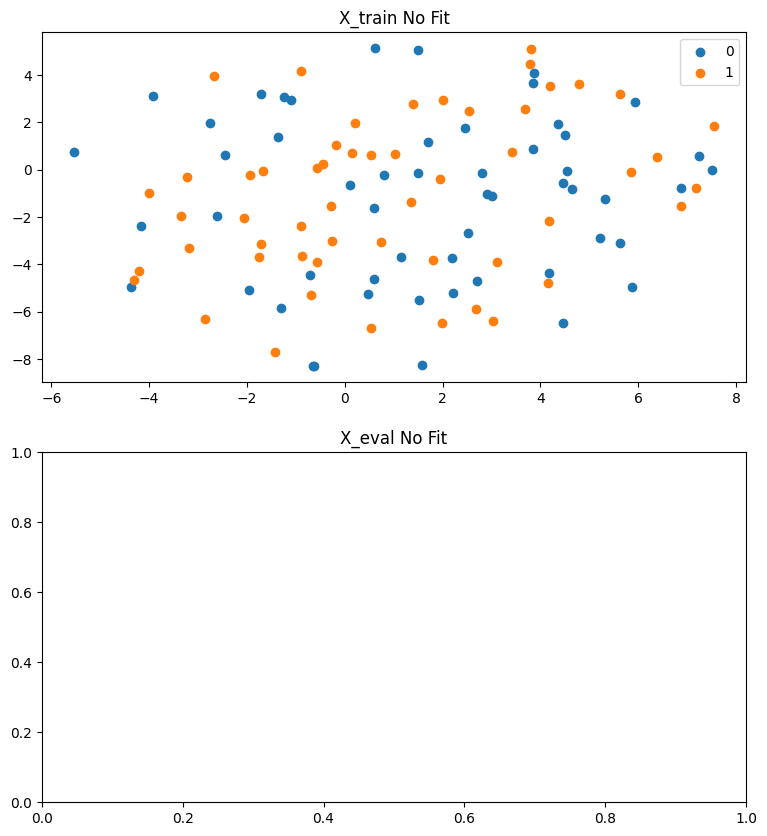

In [ ]:
#@title SetFit
st_model = 'paraphrase-mpnet-base-v2' #@param ['paraphrase-mpnet-base-v2', 'all-mpnet-base-v1', 'all-mpnet-base-v2', 'stsb-mpnet-base-v2', 'all-MiniLM-L12-v2', 'paraphrase-albert-small-v2', 'all-roberta-large-v1']
num_training = 54 #@param ["8", "16", "32", "54", "128", "256", "512"] {type:"raw"}
num_itr = 10 #@param ["1", "2", "3", "4", "5", "10"] {type:"raw"}
plot2d_checkbox = True #@param {type: 'boolean'}
epochs = 5 #@param ["1", "2", "3", "4", "5", "10", "20", "50"] {type:"raw"}

set_seed(0)
# Equal samples per class training
train_df_sample = pd.concat([train_df[train_df['hate']==0].sample(num_training), train_df[train_df['hate']==1].sample(num_training)])
x_train = train_df_sample['text'].values.tolist()
y_train = train_df_sample['hate'].values.tolist()

train_examples = [] 
for x in range(num_itr):
  train_examples = sentence_pairs_generation(np.array(x_train), np.array(y_train), train_examples)

orig_model = SentenceTransformer(st_model)
model = SentenceTransformer(st_model)

# S-BERT adaptation 
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=epochs, warmup_steps=10, show_progress_bar=True)

# No Fit
X_train_noFT = orig_model.encode(x_train)
X_eval_noFT = orig_model.encode(x_eval)


# sgd =  LogisticRegression()
# sgd.fit(X_train_noFT, y_train)
sgd.compile(loss ='mean_squared_error', optimizer = 'adam', metrics=[ "acc"])
sgd.fit(X_train_noFT, y_train1, epochs = 2*epochs, batch_size = 10, verbose = 1)
y_pred_eval_sgd = sgd.predict(X_eval_noFT)

print('Acc. No Fit', accuracy_score(y, y_pred_eval_sgd.round()))

# With Fit (SetFit)
X_train = model.encode(x_train)
X_eval = model.encode(x_eval)

# sgd =  LogisticRegression()
# sgd2.fit(X_train, y_train)

sgd2.compile(loss ='mean_squared_error', optimizer = 'adam', metrics=[ "acc"])
sgd2.fit(X_train, y_train1, epochs =2*epochs, batch_size = 10, verbose = 1)
y_pred_eval_sgd2 = sgd2.predict(X_eval)

print('Acc. SetFit', accuracy_score(y, y_pred_eval_sgd2.round()))

#Plot 2-D 2x2 figures
if plot2d_checkbox:   

  plt.figure(figsize=(20,10))

#Plot X_train_noFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_noFT))
  plt.subplot(221)
  plt.title('X_train No Fit')

  for i, t in enumerate(set(np.array(y_train))):
      idx = np.array(y_train) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   


  plt.legend(bbox_to_anchor=(1, 1));

#Plot X_eval noFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_noFT))
  plt.subplot(223)
  plt.title('X_eval No Fit')

  for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));


#Plot X_train SetFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train))

  plt.subplot(222)
  plt.title('X_train SetFit')

  for i, t in enumerate(set(np.array(y_train))):
      idx = np.array(y_train) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));


#Plot X_eval SetFit
  X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval))
  plt.subplot(224)
  plt.title('X_eval SetFit')

  for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

  plt.legend(bbox_to_anchor=(1, 1));
